In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline

# Load the sentiment classifier
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

Device set to use cpu


In [ ]:
# Example input
text = "I absolutely loved the movie! It was brilliant and emotional."

# Get prediction
result = classifier(text)
print("Predicted Sentiment:", result[0]['label'])


Predicted Sentiment: 5 stars


In [ ]:
sentences = [
    "The product quality was terrible and disappointing.",
    "I really enjoyed the user experience.",
    "It's not the best, but not the worst either.",
    "Fast delivery and great packaging.",
    "Well! THat was good but complete waste of time."
]

for sentence in sentences:
    output = classifier(sentence)
    print(f"{sentence} => {output[0]['label']}")


The product quality was terrible and disappointing. => 1 star
I really enjoyed the user experience. => 4 stars
It's not the best, but not the worst either. => 3 stars
Fast delivery and great packaging. => 5 stars
Well! THat was good but complete waste of time. => 2 stars


In [ ]:

def convert_star_to_sentiment(star):
    rating = int(star[0])
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

results = []
for sentence in sentences:
    label = classifier(sentence)[0]['label']
    sentiment = convert_star_to_sentiment(label)
    results.append(sentiment)


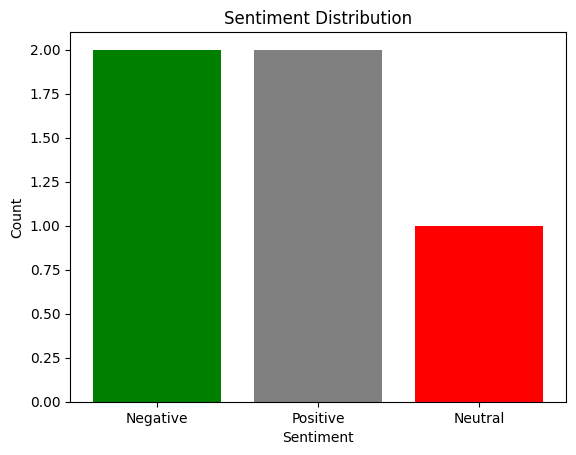

In [ ]:
# Count sentiments
from collections import Counter

sentiment_counts = Counter(results)

# Plot
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
